<a href="https://colab.research.google.com/github/samin-batra/100daysofcode/blob/main/Fatal_Force_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [2]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 9.4 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


## Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [5]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
print("Household income data")
print(df_hh_income.shape)
print(df_hh_income.columns)
print(df_hh_income.isna().value_counts())
print(df_hh_income.duplicated().value_counts())
print("High school grad data")

print(df_pct_completed_hs.shape)
print(df_pct_completed_hs.columns)
print(df_pct_completed_hs.isna().value_counts())
print(df_pct_completed_hs.duplicated().value_counts())

Household income data
(29322, 3)
Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Geographic Area  City   Median Income
False            False  False            29271
                        True                51
dtype: int64
False    29322
dtype: int64
High school grad data
(29329, 3)
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Geographic Area  City   percent_completed_hs
False            False  False                   29329
dtype: int64
False    29329
dtype: int64


In [7]:
print("Percent poverty data")
print(df_pct_poverty.shape)
print(df_pct_poverty.columns)
print(df_pct_poverty.isna().value_counts())
print(df_pct_poverty.duplicated().value_counts())

print("Racial data")
print(df_share_race_city.shape)
print(df_share_race_city.columns)
print(df_share_race_city.isna().value_counts())
print(df_share_race_city.duplicated().value_counts())


Percent poverty data
(29329, 3)
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Geographic Area  City   poverty_rate
False            False  False           29329
dtype: int64
False    29329
dtype: int64
Racial data
(29268, 7)
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Geographic area  City   share_white  share_black  share_native_american  share_asian  share_hispanic
False            False  False        False        False                  False        False             29268
dtype: int64
False    29268
dtype: int64


In [8]:

print("Fatalities data")
print(df_fatalities.shape)
print(df_fatalities.columns)
print(df_fatalities.isna().value_counts())
print(df_fatalities.duplicated().value_counts())
print(df_fatalities.info)

Fatalities data
(2535, 14)
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')
id     name   date   manner_of_death  armed  age    gender  race   city   state  signs_of_mental_illness  threat_level  flee   body_camera
False  False  False  False            False  False  False   False  False  False  False                    False         False  False          2254
                                                            True   False  False  False                    False         False  False           136
                                                            False  False  False  False                    False         True   False            51
                                             True   False   True   False  False  False                    False         False  False            45
                                            

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [9]:
df_hh_income['Median Income'].fillna(0)

0        11207
1        25615
2        42575
3        37083
4        21667
         ...  
29317        0
29318    41523
29319    77114
29320    37500
29321        0
Name: Median Income, Length: 29322, dtype: object

In [10]:
df_fatalities['age'].fillna(0)
df_fatalities['armed'].fillna("")
df_fatalities['race'].fillna("")
df_fatalities['flee'].fillna("")

0       Not fleeing
1       Not fleeing
2       Not fleeing
3       Not fleeing
4       Not fleeing
           ...     
2530    Not fleeing
2531            Car
2532            Car
2533            Car
2534    Not fleeing
Name: flee, Length: 2535, dtype: object

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [11]:

df_pct_poverty = df_pct_poverty[df_pct_poverty['poverty_rate']!='-']

In [12]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'])
df_grouped_poverty = df_pct_poverty.groupby('Geographic Area',as_index=False).agg({'poverty_rate':'mean'})
# df_grouped_poverty

In [13]:
px.bar(df_grouped_poverty,x="Geographic Area",y="poverty_rate",title="Poverty rates in states across US",labels={"Geographic Area":"State","poverty_rate":"Poverty Rates"})

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [14]:
# df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'])
df_pct_completed_hs = df_pct_completed_hs[df_pct_completed_hs['percent_completed_hs']!='-']
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [15]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'])
df_grouped_hs = df_pct_completed_hs.groupby('Geographic Area',as_index=False).agg({'percent_completed_hs':'mean'})

In [16]:
px.bar(df_grouped_hs,x="Geographic Area",y="percent_completed_hs",title="High school graduation rates in states across US",
       labels={"Geographic Area":"State","percent_completed_hs":"High School Graduation Rates"})

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

Text(0, 0.5, 'Poverty rate')

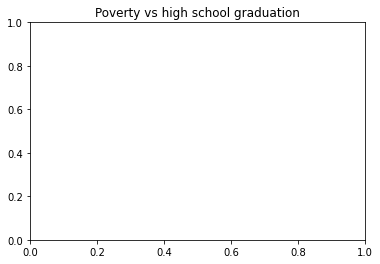

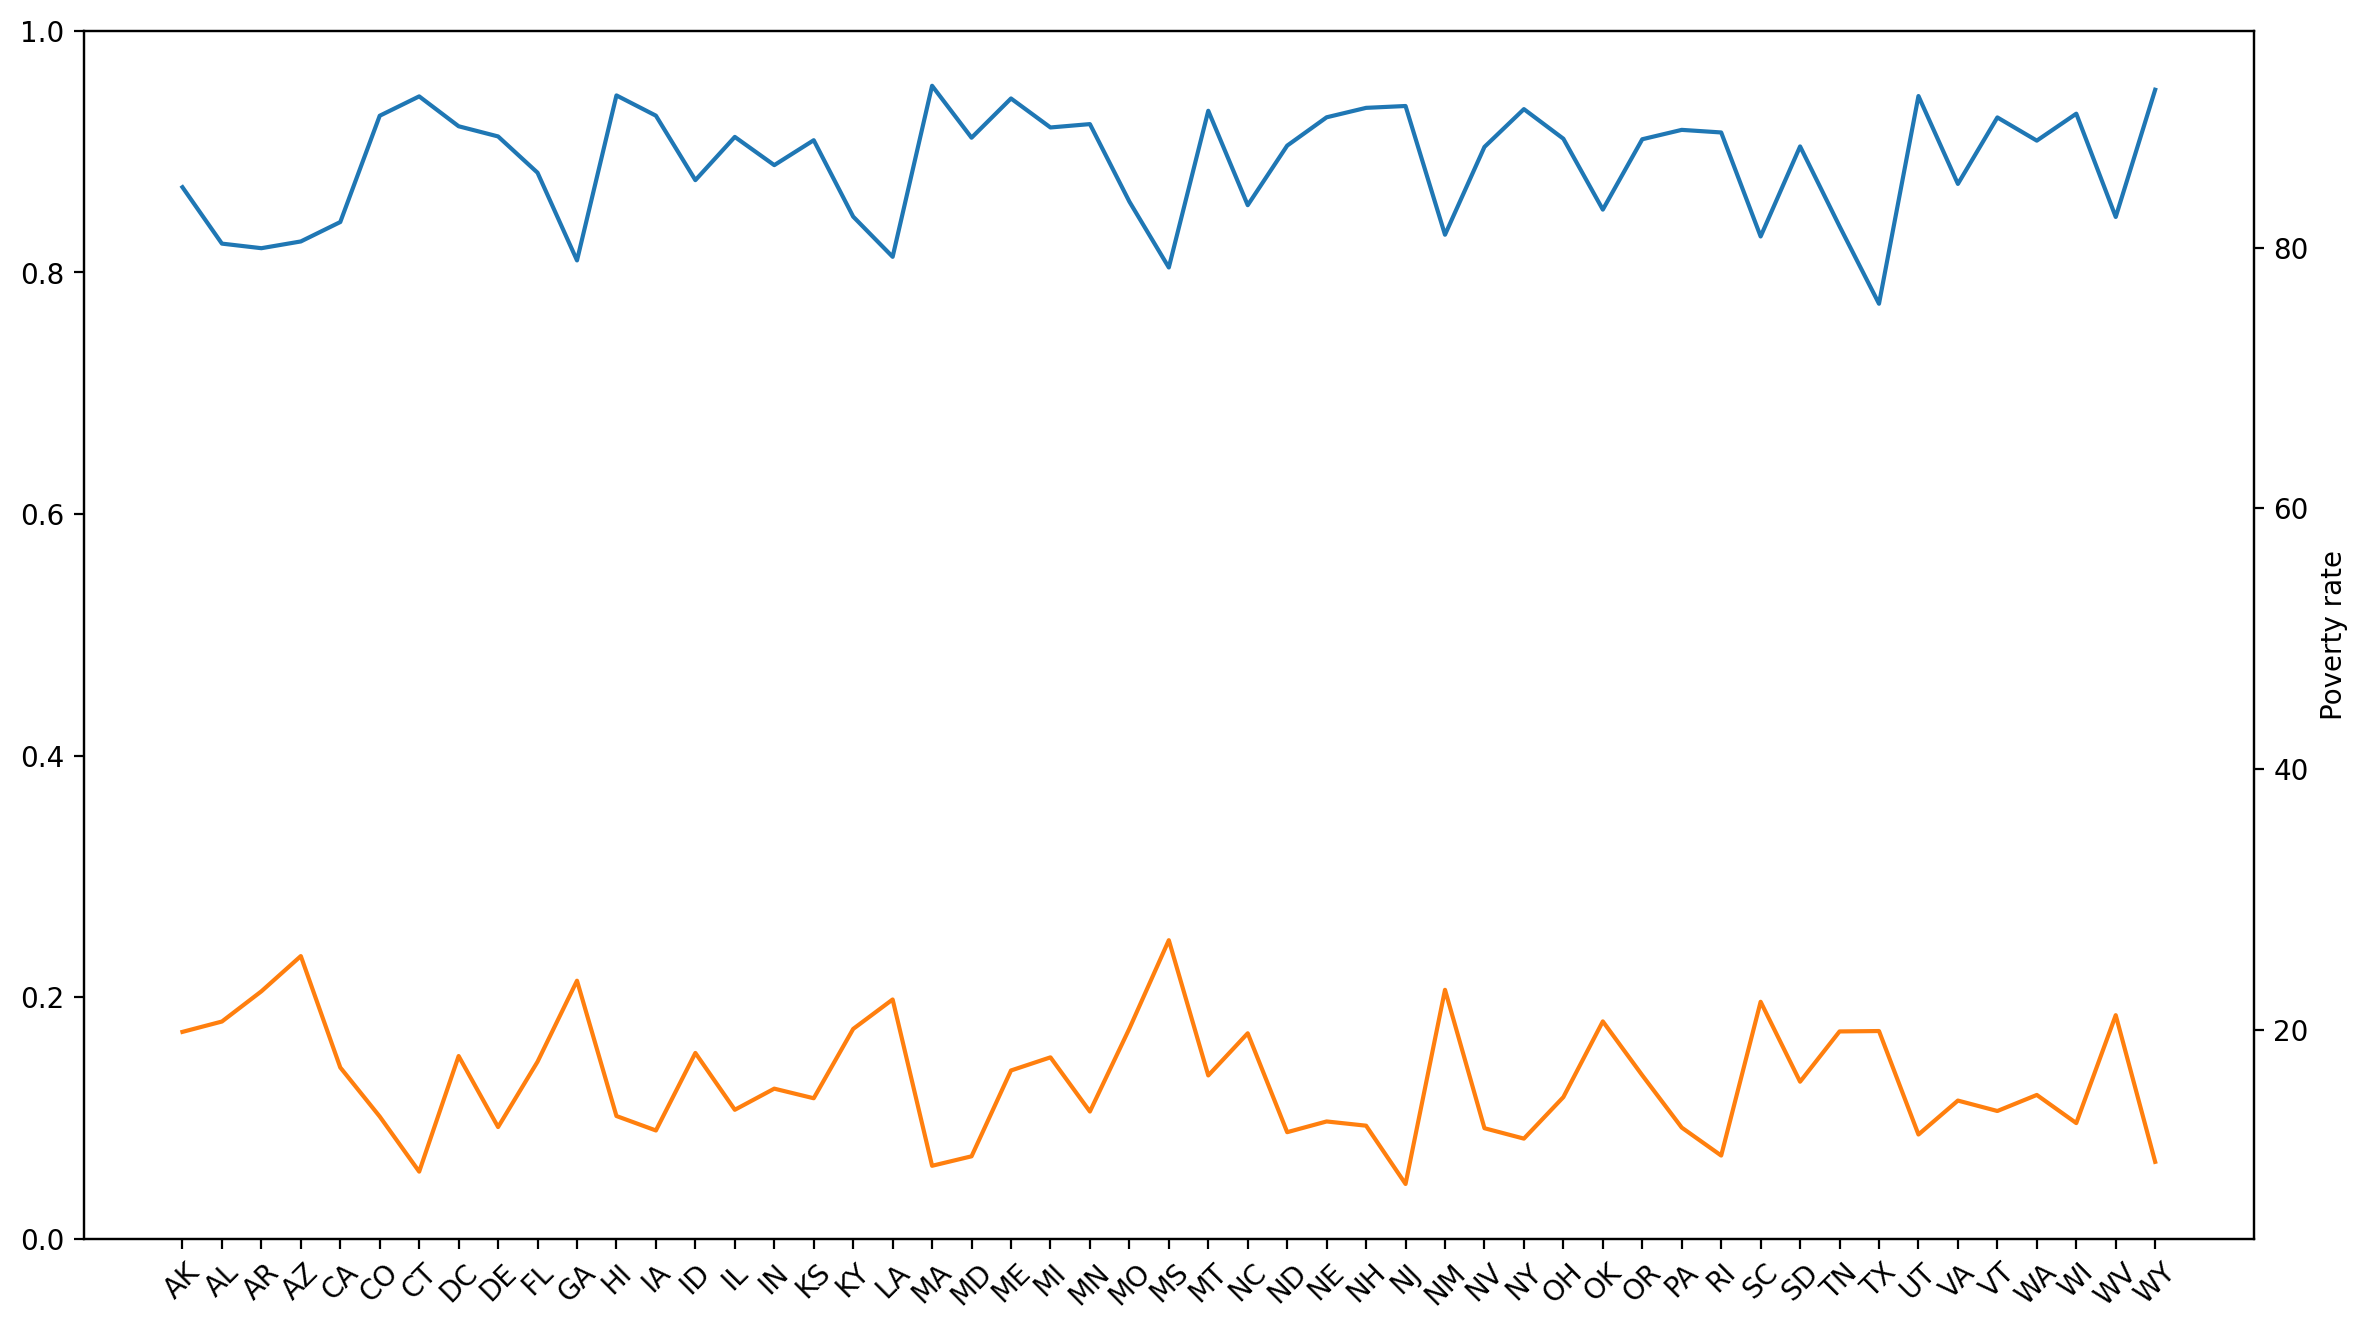

In [17]:

plt.title("Poverty vs high school graduation")
plt.figure(figsize=(14,8),dpi=200)

plt.xticks(rotation=45)

ax1 = plt.twinx()
ax1.plot(df_grouped_hs["Geographic Area"],df_grouped_hs["percent_completed_hs"])
ax2 = plt.gca()
ax1.set_xlabel("State")
ax1.set_ylabel("High school graduation rate")
ax2.plot(df_grouped_poverty["poverty_rate"])
ax2.set_ylabel("Poverty rate")


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [18]:
df_share_race_city.head()

df_share_race_city = df_share_race_city[df_share_race_city['share_white']!='(X)']
df_share_race_city['share_white'] = pd.to_numeric(df_share_race_city['share_white'])
df_share_race_city['share_black'] = pd.to_numeric(df_share_race_city['share_black'])
df_share_race_city['share_native_american'] = pd.to_numeric(df_share_race_city['share_native_american'])
df_share_race_city['share_asian'] = pd.to_numeric(df_share_race_city['share_asian'])
df_share_race_city['share_hispanic'] = pd.to_numeric(df_share_race_city['share_hispanic'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [19]:
df_race = df_share_race_city.groupby('Geographic area',as_index=False).agg({'share_white':'mean','share_black':'mean','share_native_american':'mean',
                                                             'share_asian':'mean','share_hispanic':'mean'})


In [20]:
df_race.head()
px.bar(df_race,x='Geographic area',y=["share_white","share_black","share_asian","share_hispanic"],
       labels = {'Geographic area':'States','value':'Share of Race'})

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [21]:
  # df_fatalities.head()
  df_fatalities_group = df_fatalities.groupby('race').size().reset_index(name='counts')

In [22]:
px.pie(df_fatalities_group, values='counts', names='race', title='Population of European continent')


# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [23]:
df_fatal_g = df_fatalities.groupby('gender').size().reset_index(name='counts')

In [24]:
px.bar(df_fatal_g,x='gender',y='counts',labels={'gender':'Sex','counts':'Number of fatalities'})

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [25]:
df_men = df_fatalities[df_fatalities['gender']=='M']
df_women = df_fatalities[df_fatalities['gender']=='F']  

In [26]:
df_men.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


{'boxes': [<matplotlib.lines.Line2D at 0x7fadffabb450>],
 'caps': [<matplotlib.lines.Line2D at 0x7fadffac0550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fadffac8590>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fadffac8050>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fadffabba90>,
  <matplotlib.lines.Line2D at 0x7fadffabbfd0>]}

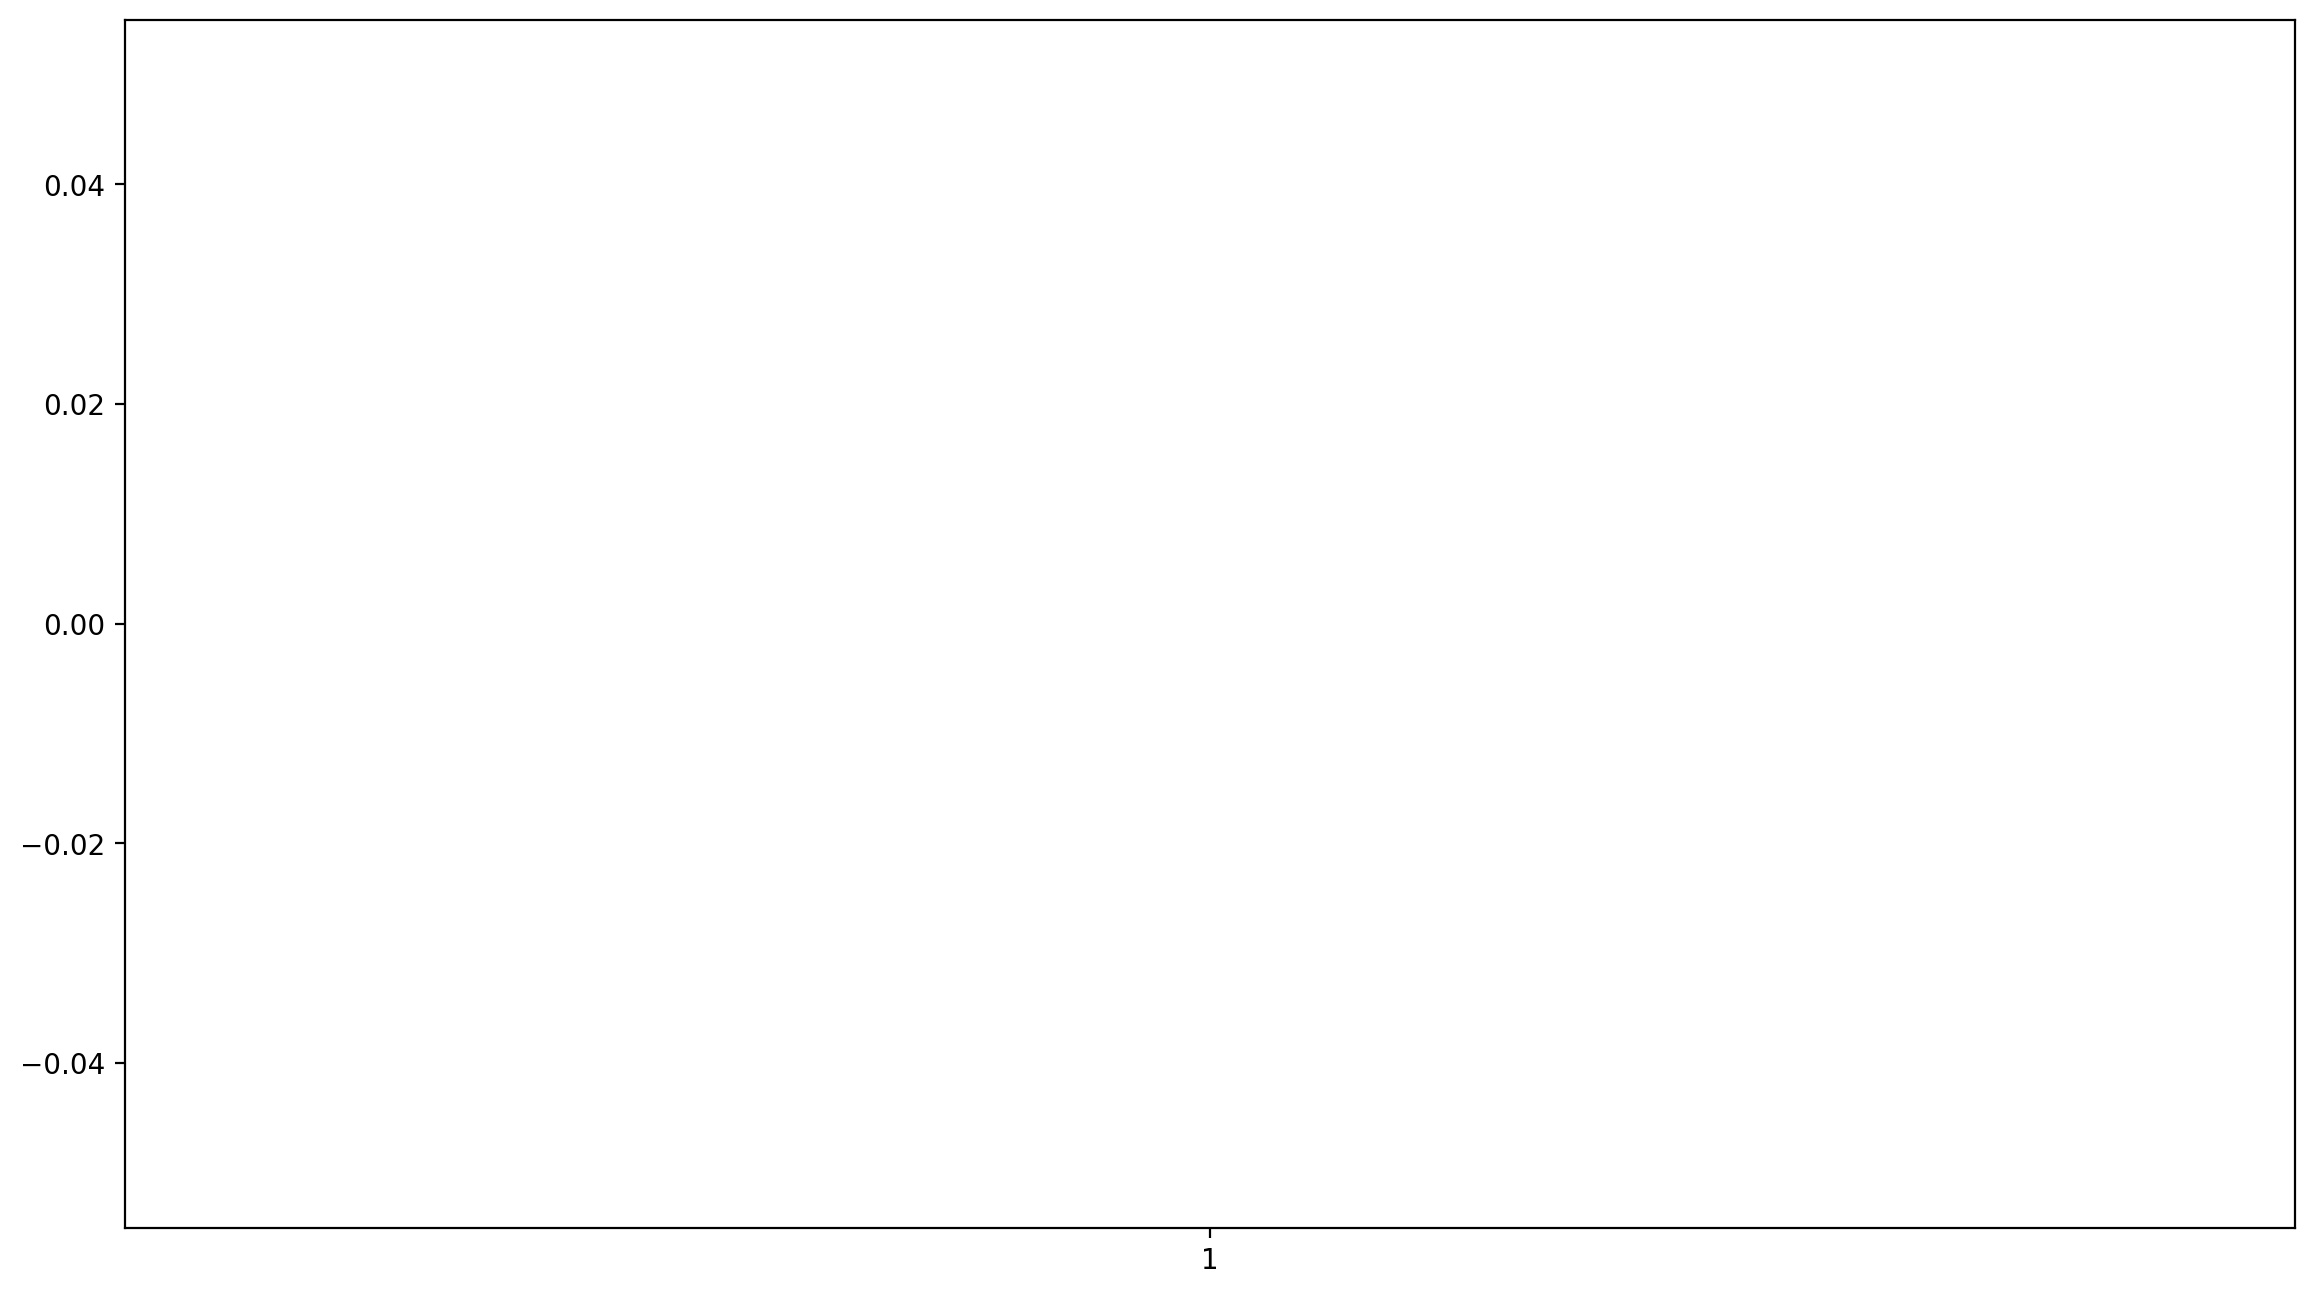

In [27]:
df_men.head()
plt.figure(figsize=(14,8),dpi=200)
plt.boxplot(df_men['age'])

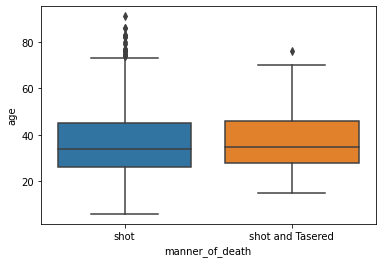

In [28]:
 sns.boxplot(y=df_men["age"],x = df_men['manner_of_death'], orient = 'v')

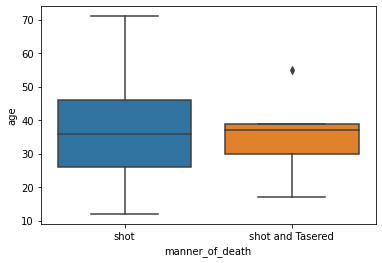

In [29]:
 sns.boxplot(y=df_women["age"],x = df_women['manner_of_death'], orient = 'v')

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [30]:
print(df_fatalities[df_fatalities['armed']=='unarmed'])
print(df_fatalities[df_fatalities['armed']!='unarmed'])

        id                 name      date   manner_of_death    armed   age  \
2        5   John Paul Quintero  03/01/15  shot and Tasered  unarmed 23.00   
8       16        Autumn Steele  06/01/15              shot  unarmed 34.00   
17      36  Artago Damon Howard  08/01/15              shot  unarmed 36.00   
62     352   Joshua Omar Garcia  26/01/15              shot  unarmed 24.00   
71     342         Ralph Willis  29/01/15              shot  unarmed 42.00   
...    ...                  ...       ...               ...      ...   ...   
2346  2604      Hayden J. Stutz  24/05/17              shot  unarmed 24.00   
2425  2691  Armando Garcia-Muro  22/06/17              shot  unarmed 17.00   
2440  2717         Aaron Bailey  29/06/17              shot  unarmed 45.00   
2494  2779       Justine Damond  15/07/17              shot  unarmed 40.00   
2506  2791       Farhad Jabbari  19/07/17              shot  unarmed 38.00   

     gender race          city state  signs_of_mental_illness  

In [31]:
df_weapon = df_fatalities.groupby('armed').size().reset_index(name='counts')

In [32]:
px.pie(df_weapon,names=df_weapon['armed'],values=df_weapon['counts'])

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [33]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

(array([  4., 292., 716., 574., 386., 279., 147.,  40.,  15.,   5.]),
 array([ 6. , 14.5, 23. , 31.5, 40. , 48.5, 57. , 65.5, 74. , 82.5, 91. ]),
 <a list of 10 Patch objects>)

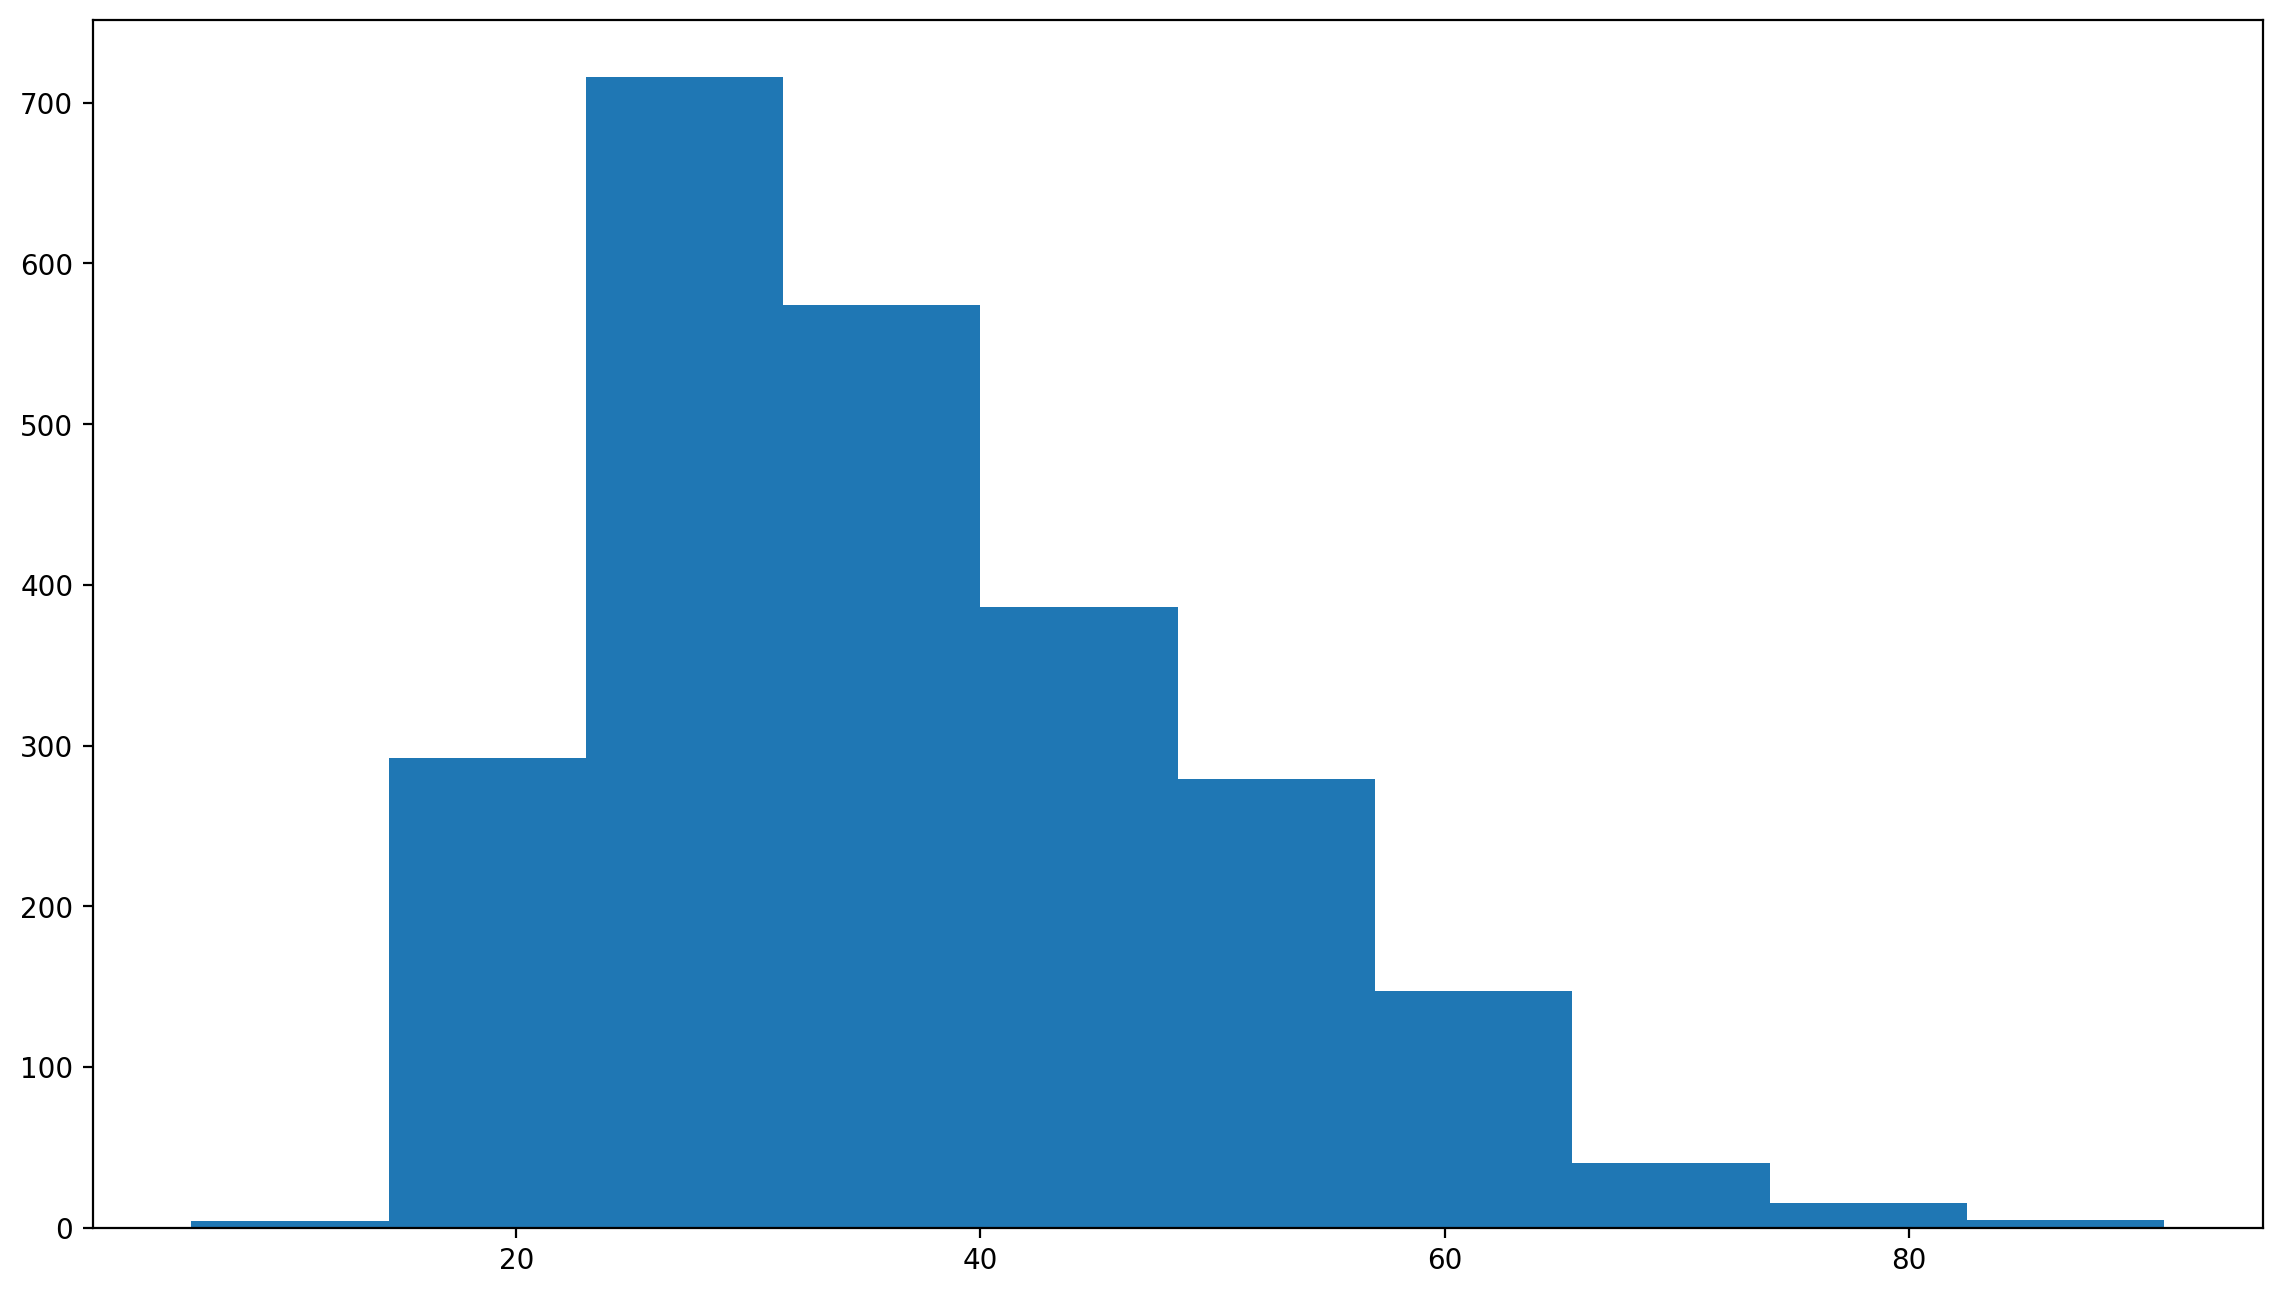

In [34]:
plt.figure(figsize=(14,8),dpi=200)
plt.hist(x=df_fatalities['age'])

Text(0, 0.5, 'Density')

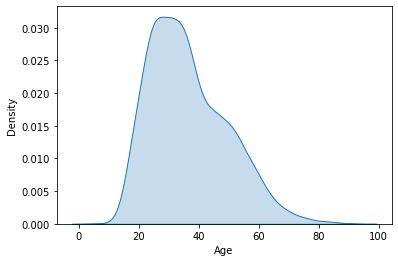

In [35]:

sns.kdeplot(df_fatalities['age'],shade=True,label="Age distribution")
plt.xlabel('Age')
plt.ylabel('Density')

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

A
W
H
B
O


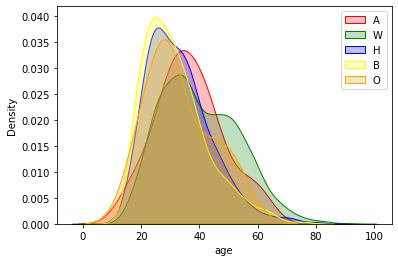

In [37]:
df_fatalities['race'].unique()
colors = ['red','green','blue','yellow','orange']
ctr=0
for race in df_fatalities['race'].unique():
  if race in ['A','W','B','H','O']:
    print(race)
    sns.kdeplot(df_fatalities.loc[df_fatalities['race']==race,'age'],shade=True,label=race,color=colors[ctr])
    # print(race)
    ctr+=1
plt.legend()
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [38]:
df_f_race = df_fatalities.groupby('race').size().reset_index(name='counts')
df_f_race.head()

,race,counts
0,A,39
1,B,618
2,H,423
3,N,31
4,O,28


In [39]:
px.bar(df_f_race,x='race',y='counts')

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [40]:
df_fatalities[df_fatalities['signs_of_mental_illness']==True].value_counts()

id    name                   date      manner_of_death  armed                age    gender  race  city         state  signs_of_mental_illness  threat_level  flee         body_camera
3     Tim Elliot             02/01/15  shot             gun                  53.00  M       A     Shelton      WA     True                     attack        Not fleeing  False          1
1729  Robert Lee Lourenco    24/07/16  shot             hatchet and gun      36.00  M       W     Winchester   CA     True                     attack        Not fleeing  False          1
1713  Bobby Horne            15/07/16  shot             gun                  63.00  M       W     Peachland    NC     True                     attack        Not fleeing  False          1
1716  Billy D. Smith         16/07/16  shot             gun                  31.00  M       W     Lake Asbury  FL     True                     attack        Not fleeing  False          1
1718  Gavin Eugene Long      17/07/16  shot             gun           

In [41]:
df_fatalities.value_counts()

id    name                      date      manner_of_death   armed         age    gender  race  city          state  signs_of_mental_illness  threat_level  flee         body_camera
3     Tim Elliot                02/01/15  shot              gun           53.00  M       A     Shelton       WA     True                     attack        Not fleeing  False          1
1783  Dominic Rollice           12/08/16  shot and Tasered  hammer        49.00  M       W     Tahlequah     OK     True                     other         Not fleeing  True           1
1776  Jesse James Romero        09/08/16  shot              gun           14.00  M       H     Los Angeles   CA     False                    attack        Foot         True           1
1777  Jeffrey Allen Morris      09/08/16  shot              undetermined  44.00  M       W     Piedmont      SC     False                    other         Not fleeing  False          1
1778  Jeff Martelli             11/08/16  shot              gun           59.00 

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [42]:
df_fatalities.groupby('city').size().reset_index(name='counts').sort_values(by='counts',ascending=False).head(10)

,city,counts
732,Los Angeles,39
995,Phoenix,31
578,Houston,27
241,Chicago,25
687,Las Vegas,21
1118,San Antonio,20
284,Columbus,19
808,Miami,18
60,Austin,18
1217,St. Louis,15


In [43]:
px.bar(df_fatalities.groupby('city').size().reset_index(name='counts').sort_values(by='counts',ascending=False).head(10),x='city',y='counts')

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [44]:
df_f_top = df_fatalities.groupby('city').size().reset_index(name='counts').sort_values(by='counts',ascending=False).head(10)
df_r_fatal = df_fatalities.groupby(['city','race']).size().reset_index(name='counts')
df_r_fatal = df_r_fatal[df_r_fatal['city'].isin(df_f_top['city'])]

In [45]:
px.bar(df_r_fatal,x='city',y='counts',color='race')

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [46]:
df_f_state = df_fatalities.groupby('state').size().reset_index(name='counts')
df_f_state.head()

,state,counts
0,AK,15
1,AL,50
2,AR,26
3,AZ,118
4,CA,424


In [47]:
df_f_state.head()
px.choropleth(df_f_state, locations="state",color="counts",locationmode="USA-states",scope="usa",hover_name="state",color_continuous_scale=px.colors.sequential.Plasma)

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [48]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [49]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])

In [61]:
df_fatalities['month'] = pd.DatetimeIndex(df_fatalities['date']).year.astype('str') + "-" + pd.DatetimeIndex(df_fatalities['date']).month.astype('str')
df_fatalities['month'] = pd.to_datetime(df_fatalities['month'])

In [63]:
df_monthly_fat = df_fatalities.groupby('month').size().reset_index(name='counts')

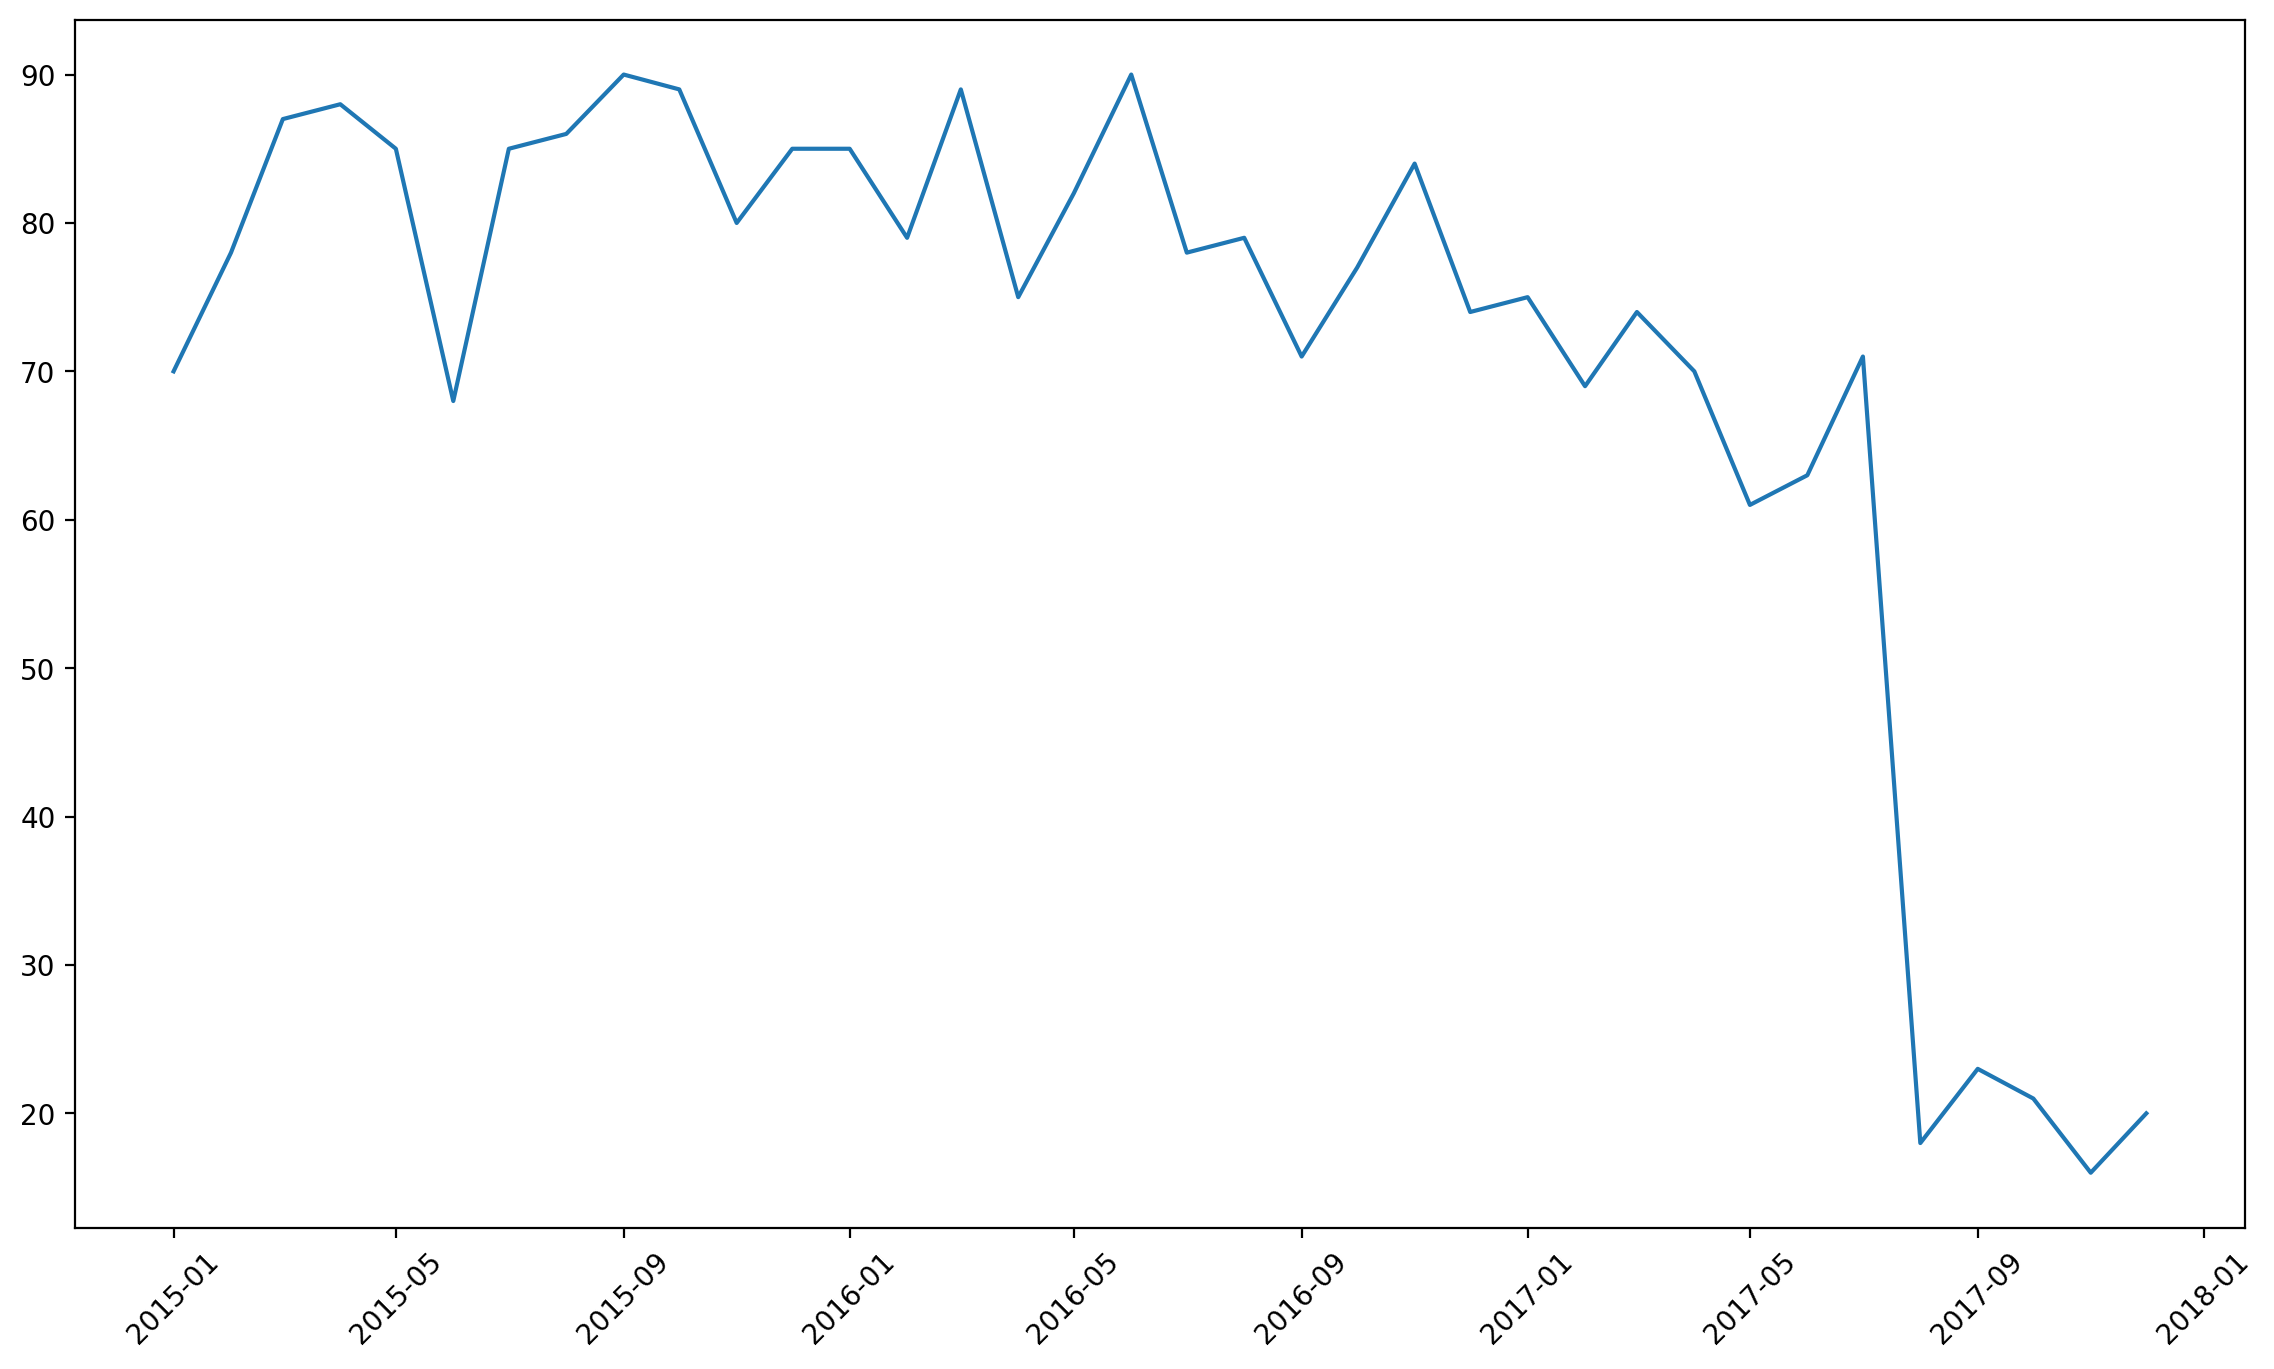

In [66]:
plt.figure(figsize=(14,8),dpi=200)
plt.xticks(rotation=45)
plt.plot(df_monthly_fat['month'],df_monthly_fat['counts'])

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).